In [1]:
import pandas as pd 
import matplotlib.pyplot as mp
import numpy
import tkinter as tk 
from tkinter import filedialog, Text
import os

<AxesSubplot:title={'center':'Deep learning per experiment'}, ylabel='Files'>

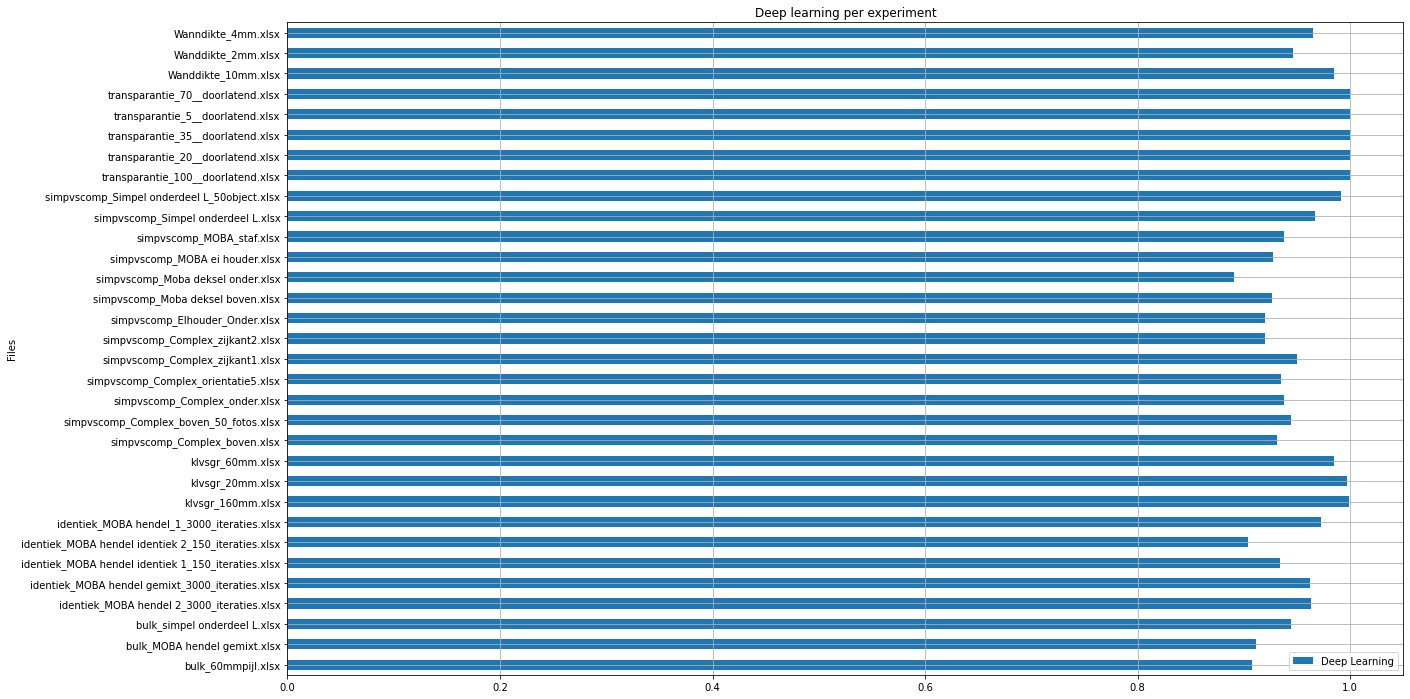

In [2]:
#This program calculates all the deep learnings per experiment
#Author: Arie Hoekstra

#Directory we want to search
directory = "Excel Resultaten"
#List to store all the files with path
excel = []
#List with just the file names
files = []
y = 0

#Loop over all the files in the directory    
for file in os.listdir(directory):
    #decode
     filename = os.fsdecode(file)
     if filename.endswith(".xlsx"):
         #store path to file in temp variable
         temp = os.path.join(directory, filename) 
         #insert into the excel
         excel.insert(y, temp)
         y = y + 1
         continue
     else:
         continue

i = 0
#array to store all dl values
deep = []

#Loop over all the excel sheets
for sheet in excel:
    #Select the D column (Deep learning score)
    df = pd.read_excel(sheet, usecols="d")
    #Insert into deep learning list 
    deep.insert(i, df.iat[25,0])
    #Delete directory from path
    files.insert(i, sheet.replace('Excel Resultaten\\', ''))
    i = i + 1


#Create dataframe
df = pd.DataFrame()
#Add two columns with the names and the corresponding values
df['Deep Learning'] = deep
df['Files'] = files

#Export dataframe to excel 
df.to_excel('totalscore.xlsx', index=False)

#Get data from the excel
df = pd.read_excel('totalscore.xlsx')
#Plot the graph
df.plot(x='Files', kind="barh", figsize=(20,12), xlabel="Files", ylabel = "Deep learning score", title="Deep learning per experiment", grid=True)